In [183]:
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns


# from sklearn.base import BaseEstimator, TransformerMixin
# 
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from category_encoders import TargetEncoder

from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LinearRegression

from sklearn.tree import DecisionTreeRegressor

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression, mutual_info_regression

from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.metrics import make_scorer, r2_score, mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.pipeline import Pipeline


import optuna


import tqdm
import joblib
import pickle
# serializd your object and svaes its binary form 

import shap


pd.set_option('display.max_columns', 70)
plt.rcParams['axes.spines.top']=False
plt.rcParams['axes.spines.right']=False

style.use('ggplot')
sns.set_palette('Set2')
# blue, orange, green

import warnings
warnings.filterwarnings('ignore')

In [58]:
df = pd.read_csv('WildBlueberryPollinationSimulationData.csv')

In [59]:
df.head()

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.410652,0.408159,31.678898,3813.165795
1,1,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,1.0,0.10,0.444254,0.425458,33.449385,4947.605663
2,2,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,16.0,0.26,0.383787,0.399172,30.546306,3866.798965
3,3,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.407564,0.408789,31.562586,4303.943030
4,4,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.354413,0.382703,28.873714,3436.493543


In [60]:
df.shape

(777, 18)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Row#                  777 non-null    int64  
 1   clonesize             777 non-null    float64
 2   honeybee              777 non-null    float64
 3   bumbles               777 non-null    float64
 4   andrena               777 non-null    float64
 5   osmia                 777 non-null    float64
 6   MaxOfUpperTRange      777 non-null    float64
 7   MinOfUpperTRange      777 non-null    float64
 8   AverageOfUpperTRange  777 non-null    float64
 9   MaxOfLowerTRange      777 non-null    float64
 10  MinOfLowerTRange      777 non-null    float64
 11  AverageOfLowerTRange  777 non-null    float64
 12  RainingDays           777 non-null    float64
 13  AverageRainingDays    777 non-null    float64
 14  fruitset              777 non-null    float64
 15  fruitmass             7

In [62]:
df.describe()

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000
mean,388.000000,18.767696,0.417133,0.282389,0.468817,0.562062,82.277091,49.700515,68.723037,59.309395,28.690219,48.613127,18.309292,0.320000,0.502121,0.445983,36.122432,6012.849165
std,224.444871,6.999063,0.978904,0.066343,0.161052,0.169119,9.193745,5.595769,7.676984,6.647760,3.209547,5.417072,12.124226,0.171279,0.079445,0.040333,4.377889,1356.955318
min,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,69.700000,39.000000,58.200000,50.200000,24.300000,41.200000,1.000000,0.060000,0.192732,0.311921,22.079199,1637.704022
25%,194.000000,12.500000,0.250000,0.250000,0.380000,0.500000,77.400000,46.800000,64.700000,55.800000,27.000000,45.800000,3.770000,0.100000,0.454725,0.416281,33.116091,5124.854901
50%,388.000000,12.500000,0.250000,0.250000,0.500000,0.630000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,16.000000,0.260000,0.508297,0.445587,36.166044,6107.382466
75%,582.000000,25.000000,0.500000,0.380000,0.630000,0.750000,89.000000,52.000000,71.900000,66.000000,30.000000,50.800000,24.000000,0.390000,0.561297,0.476149,39.239668,7022.189731
max,776.000000,40.000000,18.430000,0.585000,0.750000,0.750000,94.600000,57.200000,79.000000,68.200000,33.000000,55.900000,34.000000,0.560000,0.652144,0.535660,46.585105,8969.401842


In [63]:
for feature in df.columns:
    print(f'{feature} :\n {df[feature].unique()}')
    print(50*'-')
    
    

Row# :
 [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 24

yield :
 [3813.165795 4947.605663 3866.798965 4303.94303  3436.493543 2825.003738
 2625.269164 2379.905214 4234.868585 5356.871861 4057.555205 3941.255122
 4768.594369 3720.711588 3900.344042 3387.785165 2688.028831 2508.375673
 1945.530615 4310.625398 4830.959809 3911.422247 4051.551293 3837.512961
 3269.271761 4503.161856 5126.993178 4248.355054 4476.811464 3662.183125
 2988.05944  3049.260316 2384.728916 4898.835857 5831.7066   4334.841218
 5246.521458 4356.945873 3822.981667 3182.698648 4870.625368 5739.924933
 4546.786741 5360.873908 4045.479657 3385.364224 3385.148001 2452.680747
 5221.357411 6318.708722 4705.626533 5996.078548 6691.043218 5501.878077
 6010.760082 4999.156215 3968.330182 3784.119353 3139.432546 6125.695384
 7041.380179 5876.960007 6244.195761 5556.372277 5086.609905 5482.081299
 4247.508926 6578.235221 7267.28344  5746.777027 6564.958302 5347.718939
 4350.42467  4177.015203 3496.352359 7016.89385  7570.48492  6198.064956
 6801.323934 6030.980735 5728.748277 5647.

In [64]:
df['honeybee'].value_counts()

0.250     446
0.500     302
0.750      11
0.000       8
0.537       6
6.640       2
18.430      2
Name: honeybee, dtype: int64

In [65]:
df.duplicated().sum()

0

In [66]:
df.isna().sum()

Row#                    0
clonesize               0
honeybee                0
bumbles                 0
andrena                 0
osmia                   0
MaxOfUpperTRange        0
MinOfUpperTRange        0
AverageOfUpperTRange    0
MaxOfLowerTRange        0
MinOfLowerTRange        0
AverageOfLowerTRange    0
RainingDays             0
AverageRainingDays      0
fruitset                0
fruitmass               0
seeds                   0
yield                   0
dtype: int64

### Observations

- There are 17 independent features with all having numerical datatype and yield is an target feature
- No null value and duplicated row observed
- There are 4 outlier values in honeybee dataset
- Highest record of the upper band daily air temperature during the bloom season ranges in between 69.7-89 deg C
- Lowest record of the upper band daily air temperature during the bloom season ranges in between 39-57.2 deg C
- Average of the upper band daily air temperature ranges between 58.2-79 deg C
- Highest record of the lower band daily air temperature during the bloom season ranges in between 50.2-68.2 deg C
- Lowest record of the lower band daily air temperature during the bloom season ranges in between 24.3-33 deg C
- Average of the upper band daily air temperature ranges between 41.2-55.9 deg C
- Fruitset, Fruitmass, seeds and yield columns are have the continuous values, can check the distribution

## EDA

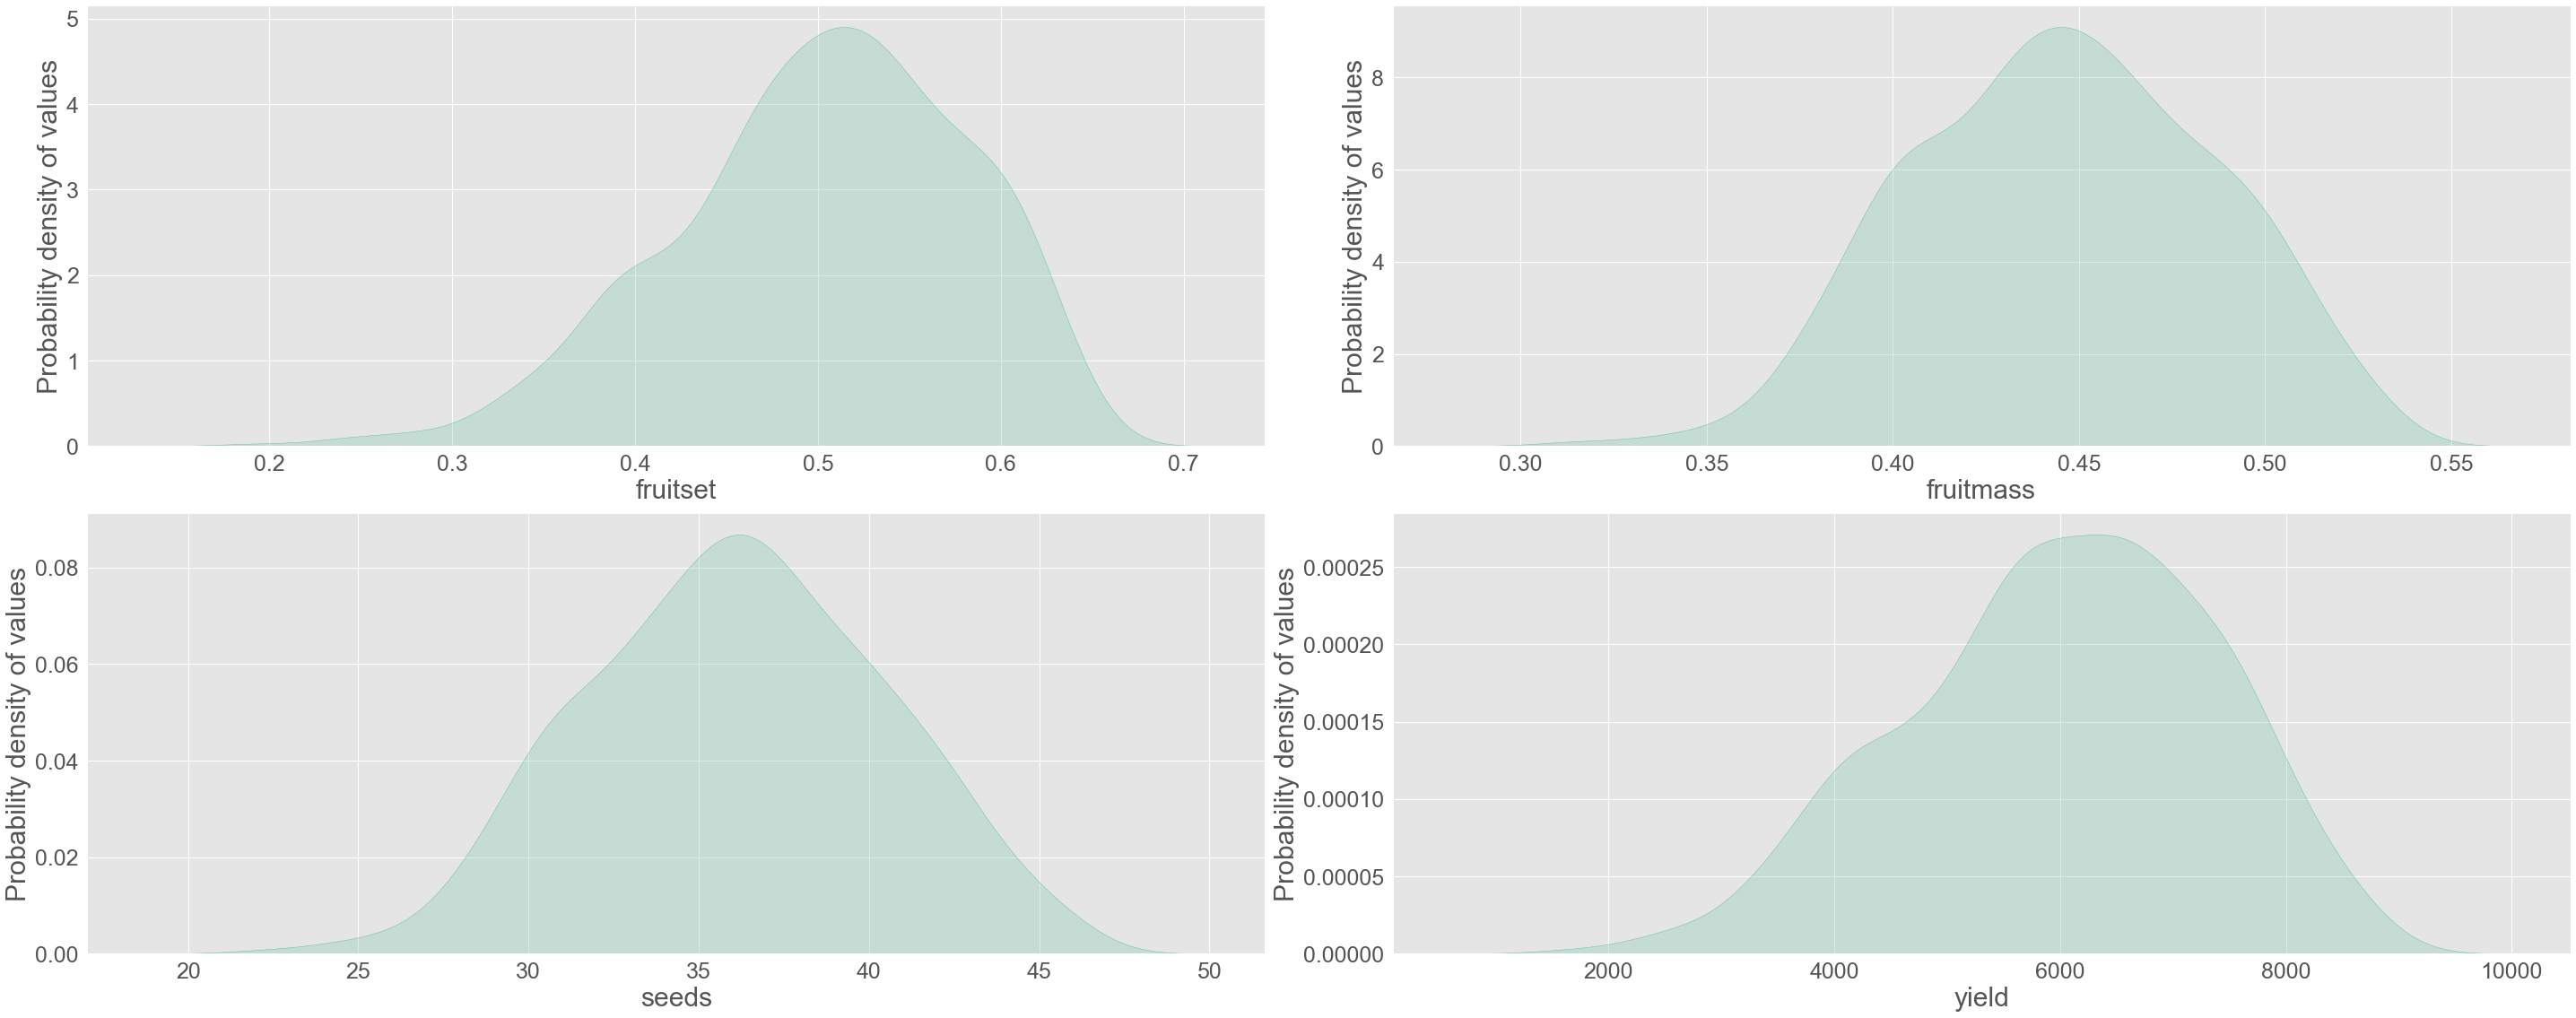

In [67]:
plt.figure(figsize=(40,70))


for i,col in enumerate(['fruitset','fruitmass','seeds','yield']):
        ax=plt.subplot(9,2,i+1)
        sns.kdeplot(df[col],ax=ax,shade=True)
        ax.set_xlabel(f'{col}',fontsize=30)
        ax.set_ylabel('Probability density of values',fontsize=30)
        ax.tick_params(axis='both', which='major', labelsize=25)
        
plt.tight_layout()        
plt.show()

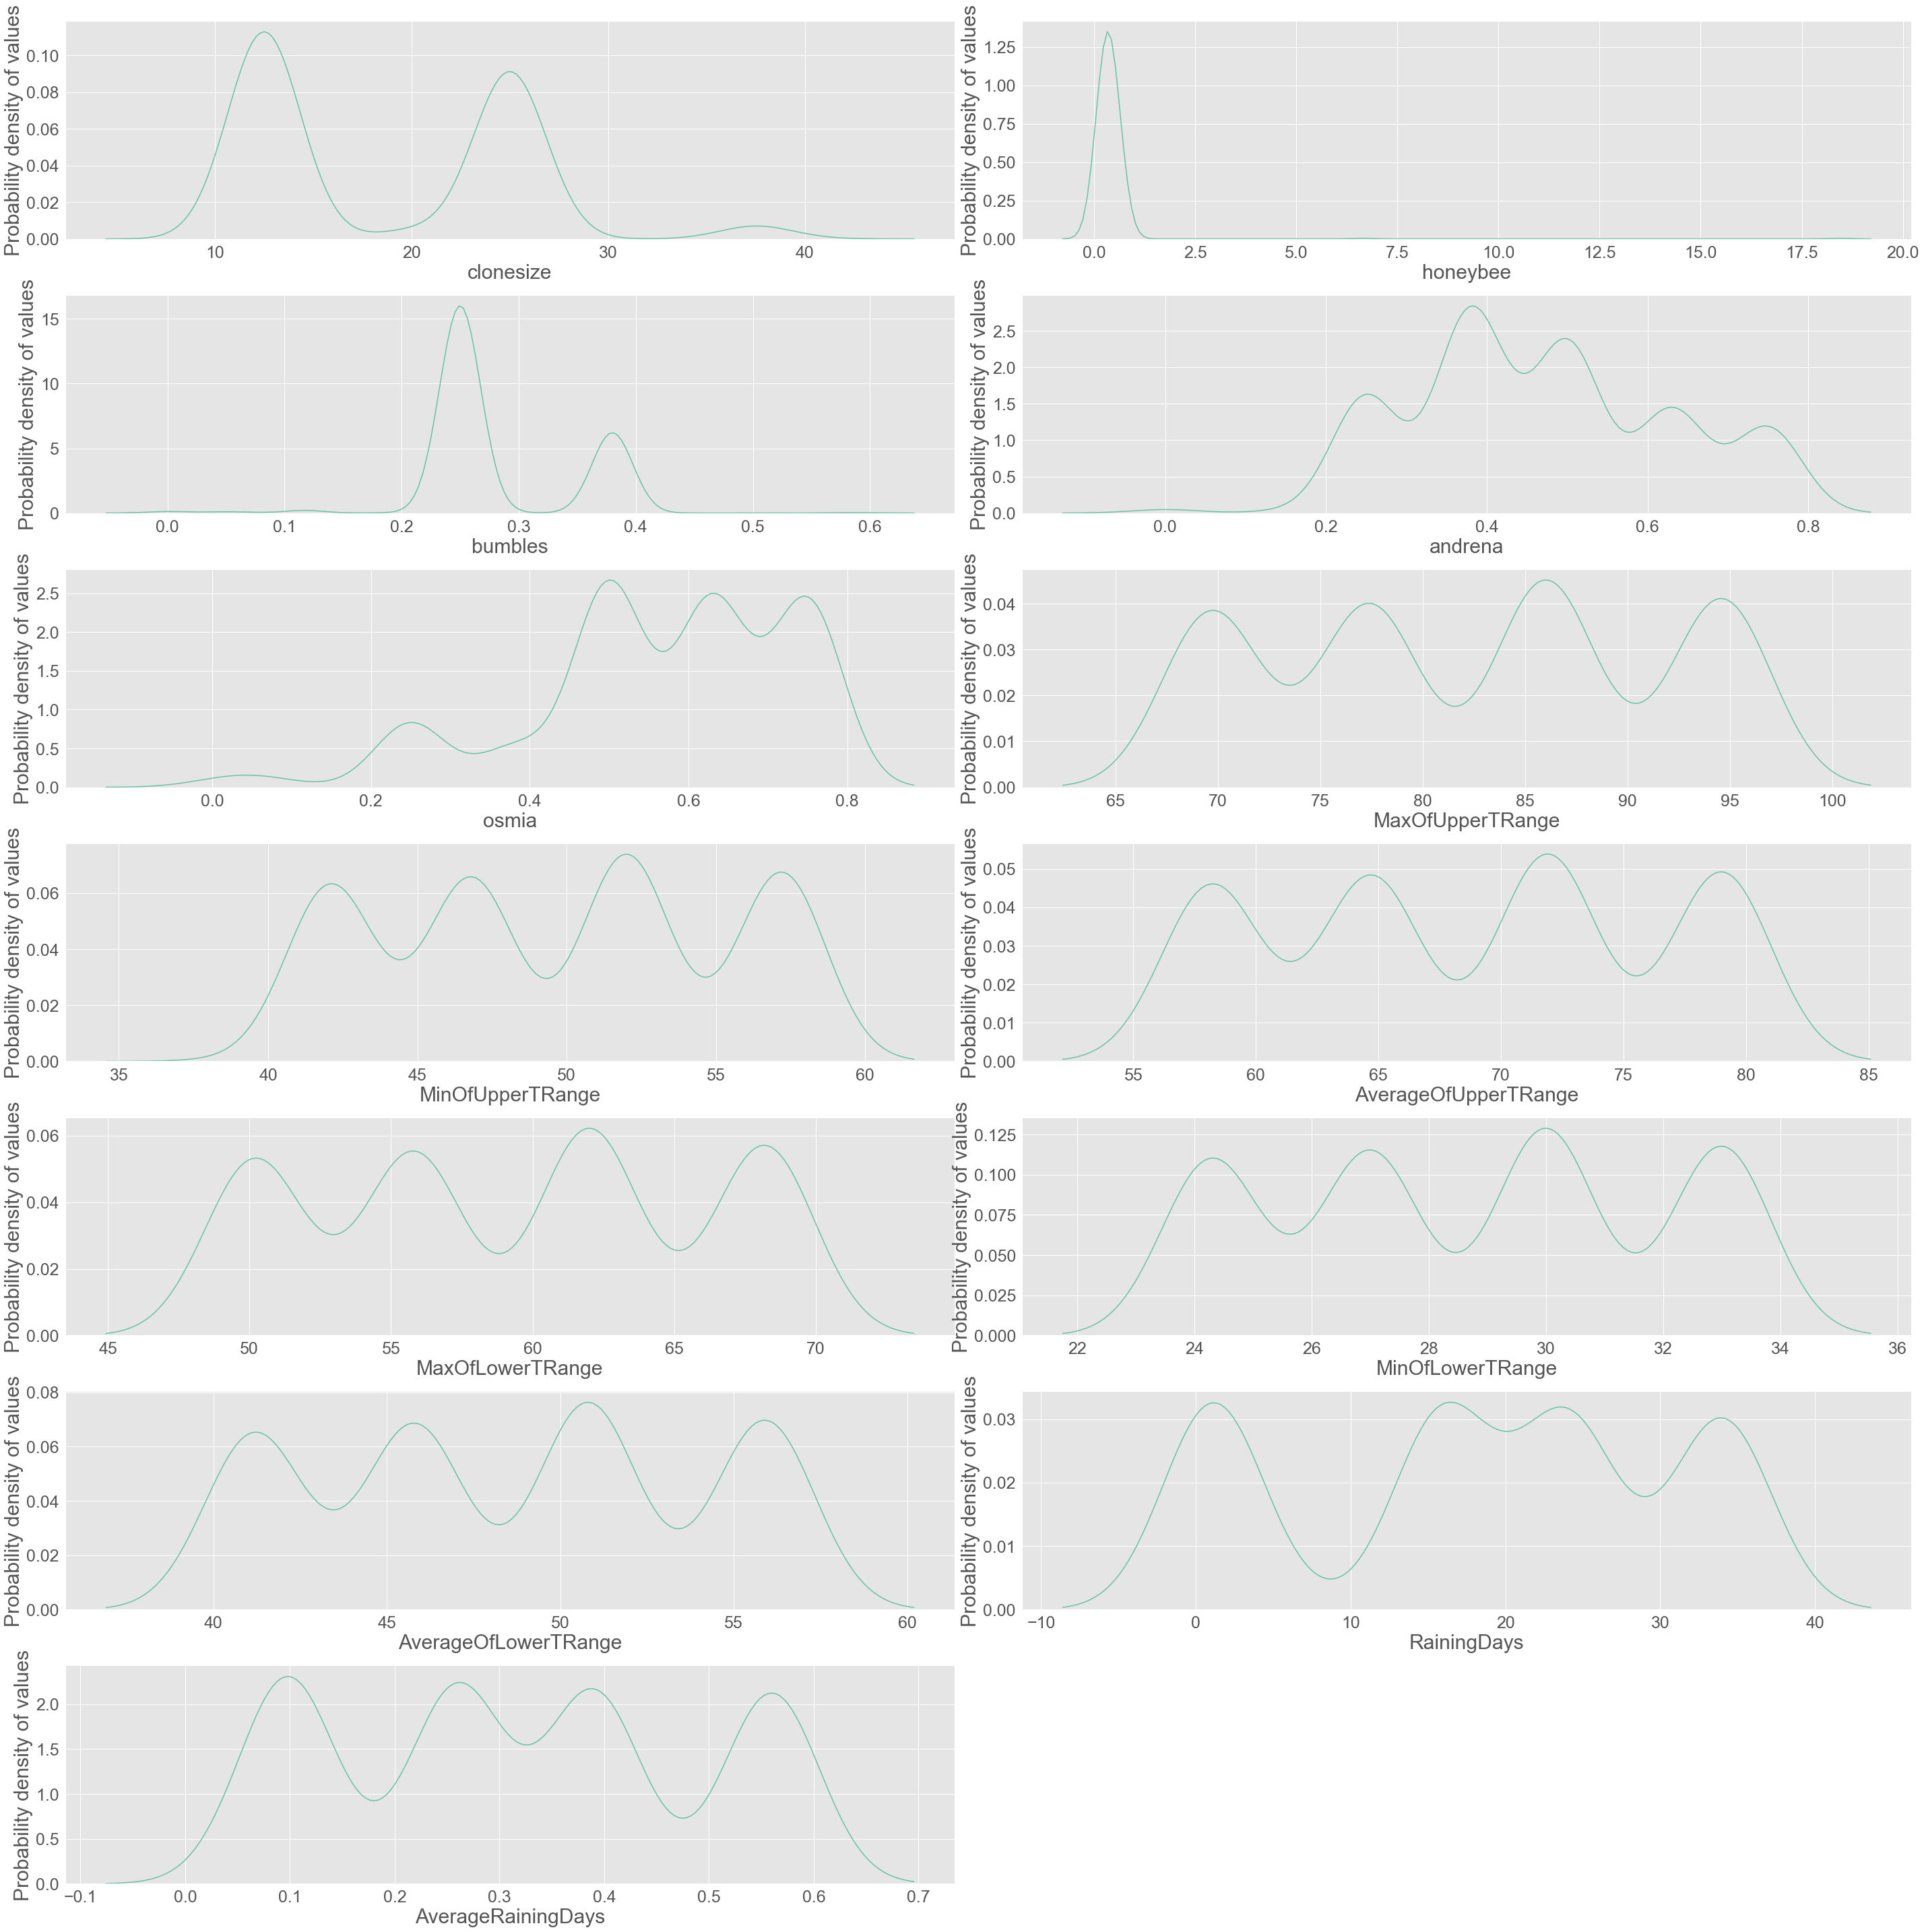

In [68]:
plt.figure(figsize=(40,50))

plot_data = df.drop(['Row#','fruitset','fruitmass','seeds','yield'], axis=1)

for i,col in enumerate(plot_data.columns):
    ax=plt.subplot(9,2,i+1)
    sns.kdeplot(df[col],ax=ax)
    ax.set_xlabel(f'{col}',fontsize=30)
    ax.set_ylabel('Probability density of values',fontsize=30)
    ax.tick_params(axis='both', which='major', labelsize=25)

plt.tight_layout()
plt.show()

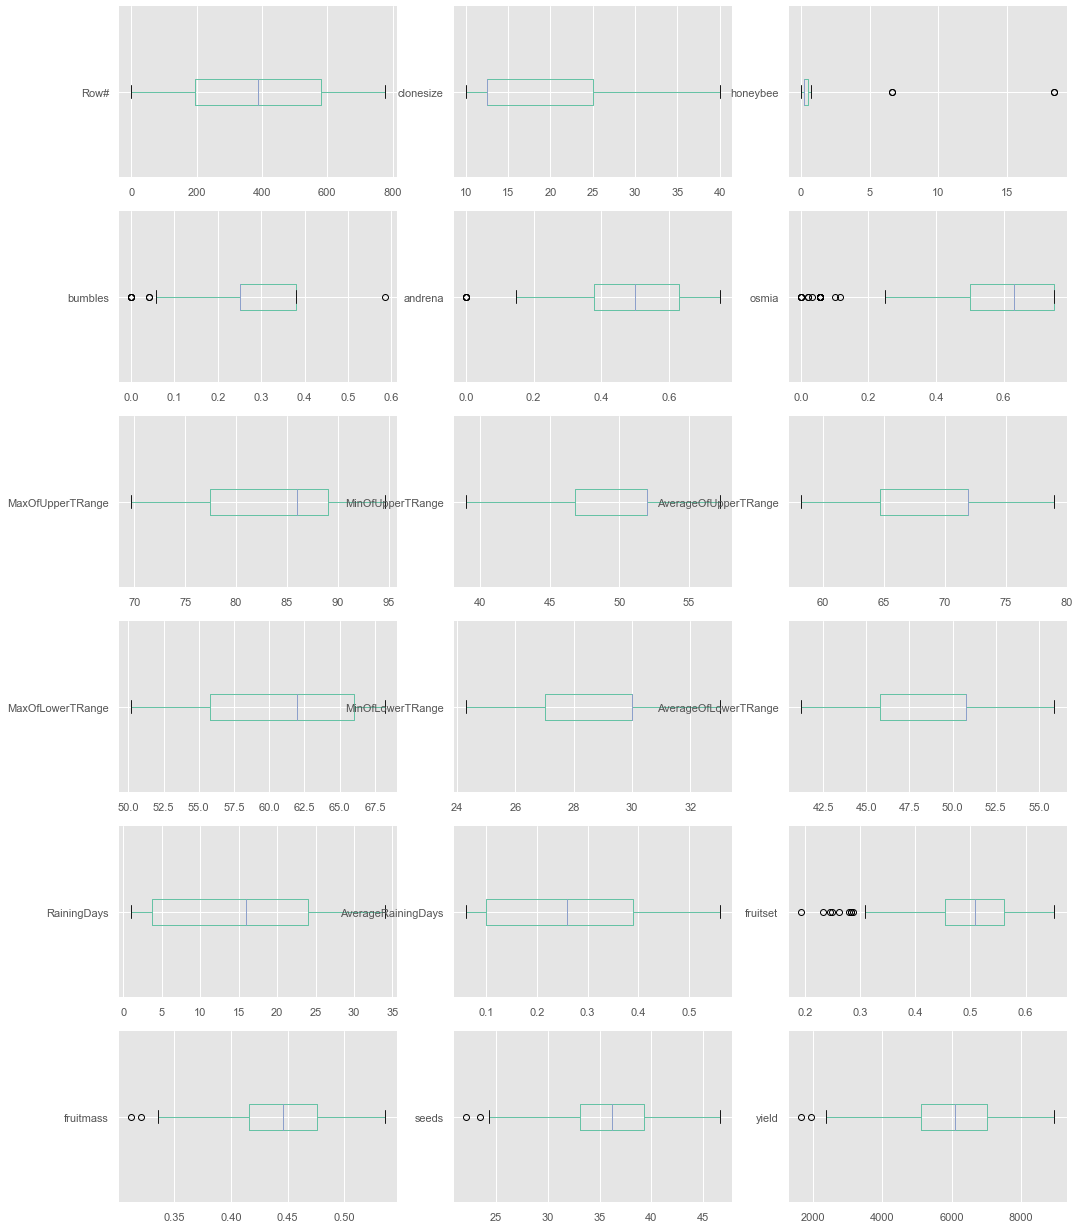

In [69]:
df.plot(kind="box", 
                vert=False, # makes horizontal plots instead of vertical
                subplots=True, 
                layout = (6,3), 
                figsize=(17,22), 
                sharex=False, 
                sharey=False);

### Plotting the continuous features with the target (Blueberry yield)

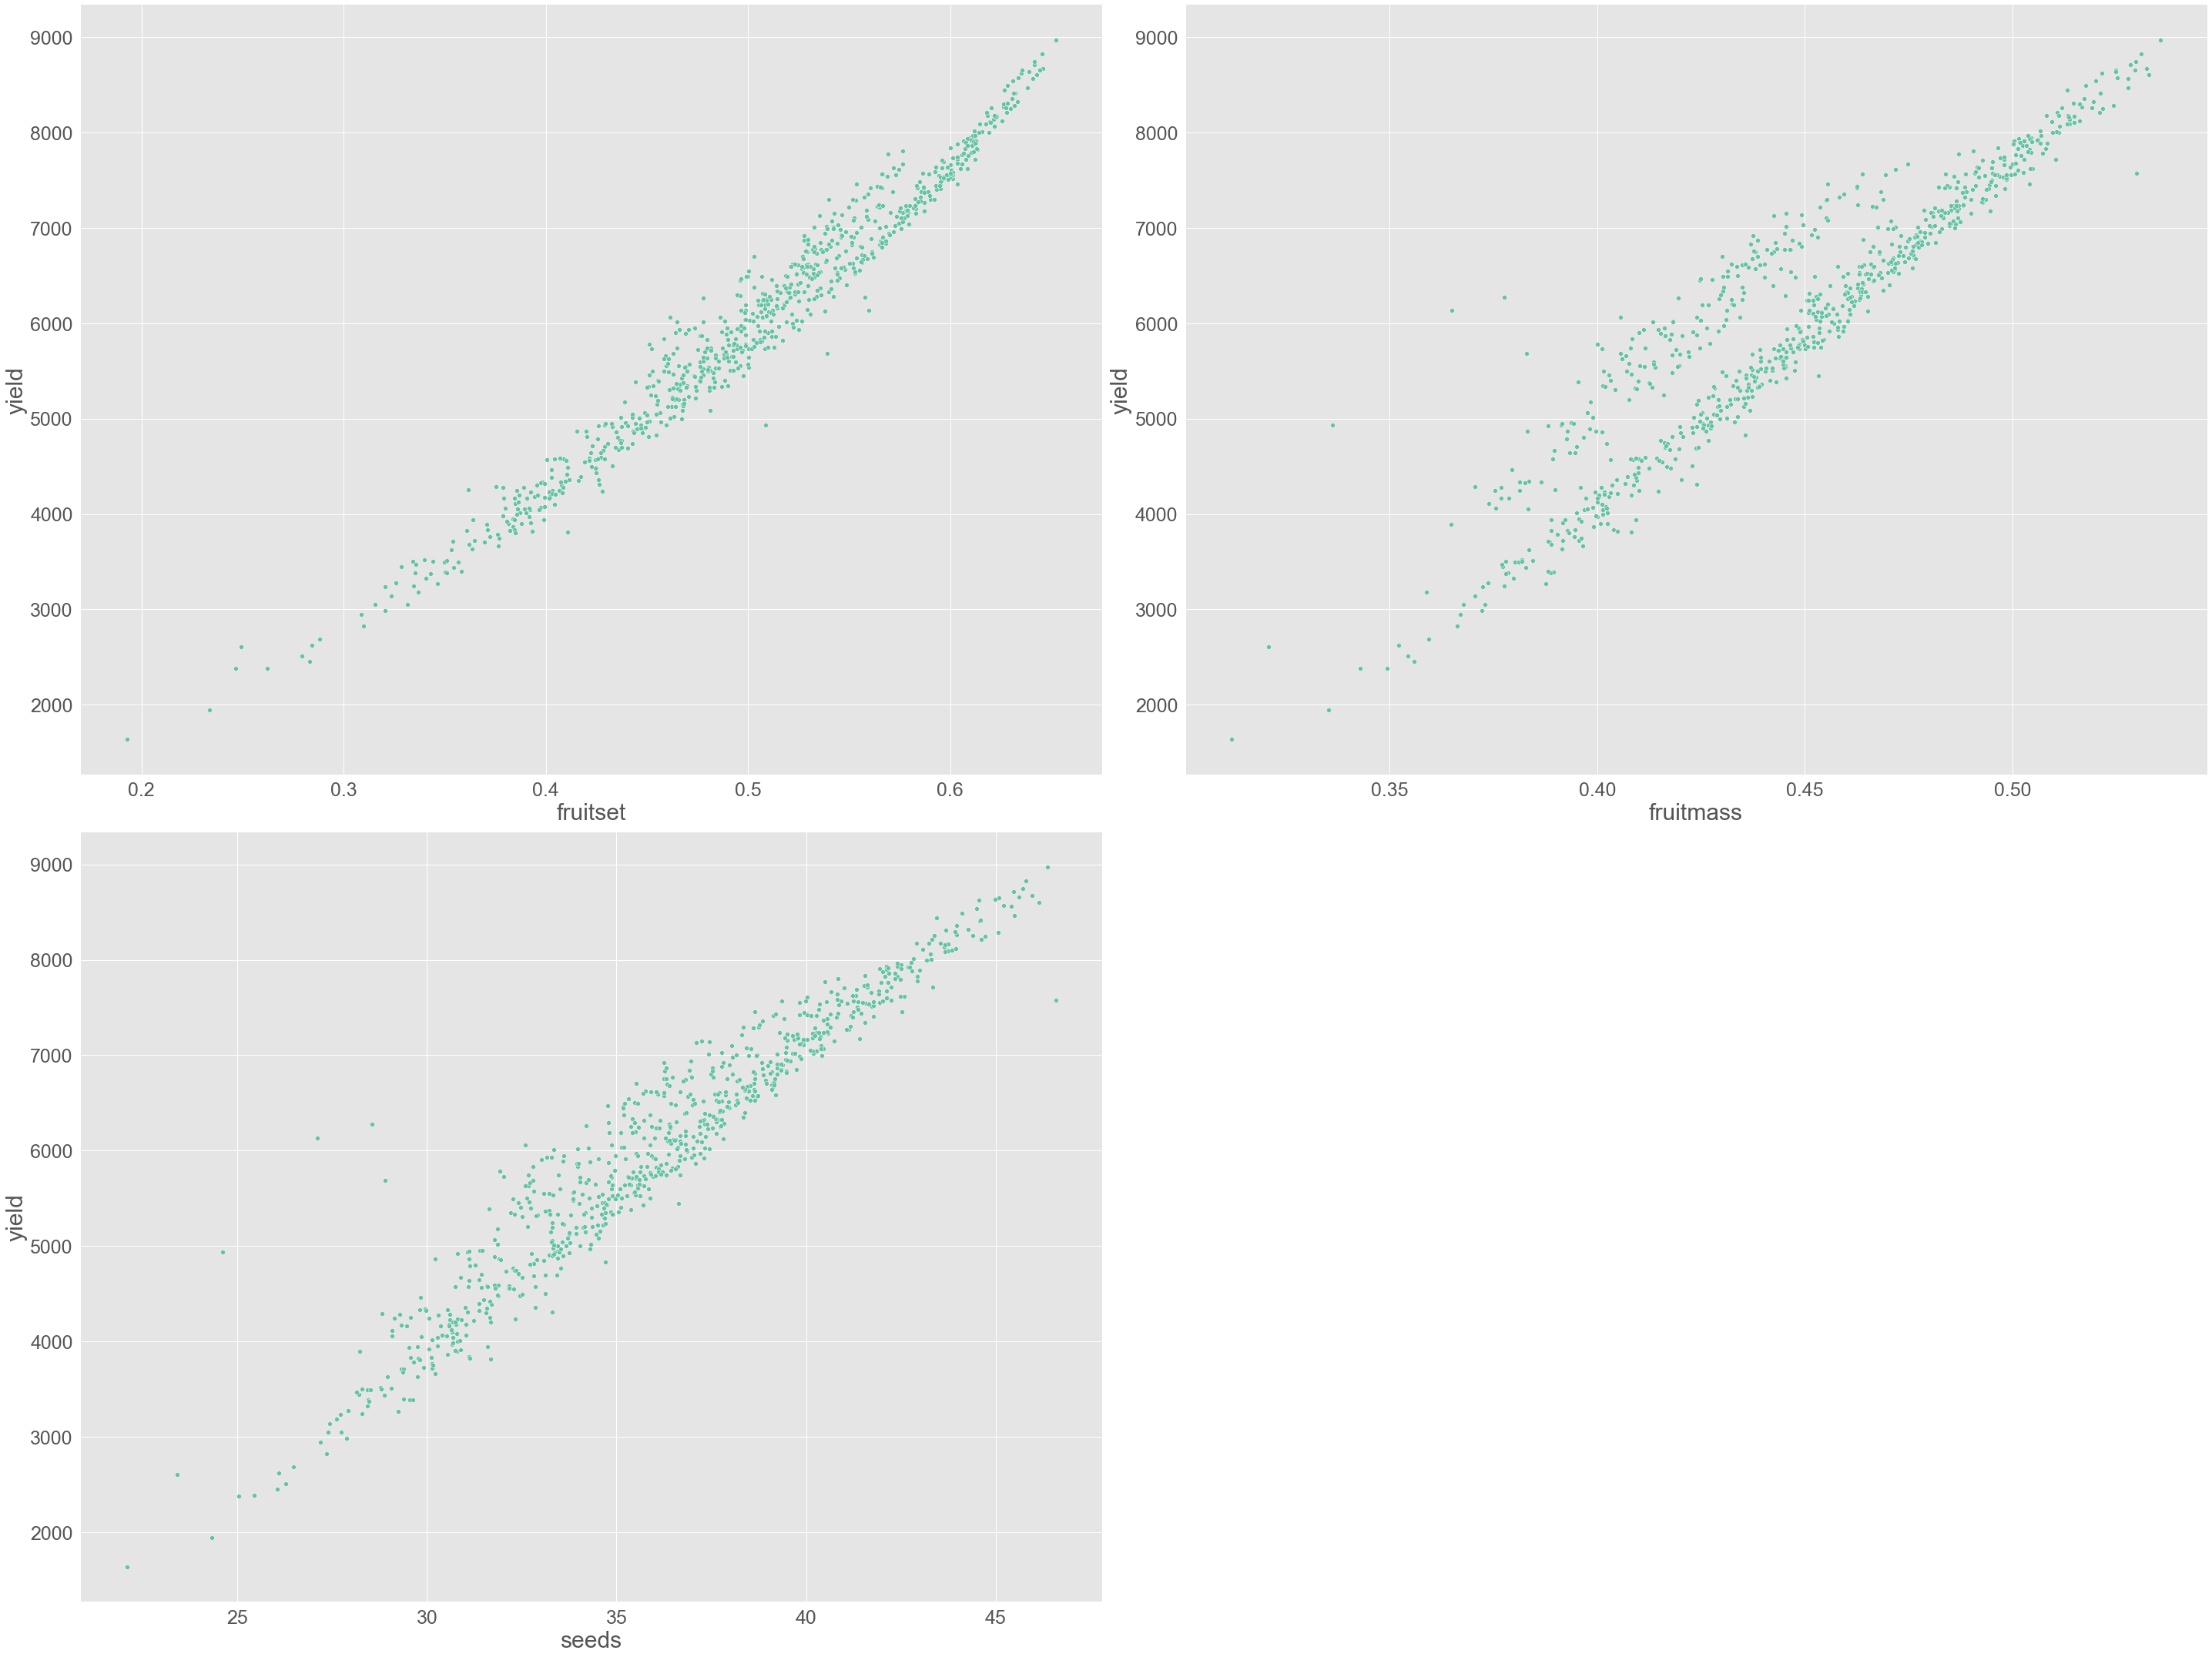

In [70]:
plt.figure(figsize=(40,30))

plt.subplots_adjust(top=0.94, bottom=0.05, hspace=0.3, wspace=0.2)

for i,col in enumerate(['fruitset','fruitmass','seeds']):
        ax=plt.subplot(2,2,i+1)
        sns.scatterplot(df[col],df['yield'],ax=ax)
        ax.set_xlabel(f'{col}',fontsize=30)
        ax.set_ylabel('yield',fontsize=30)
        ax.tick_params(axis='both', which='major', labelsize=25)
        
plt.tight_layout()        

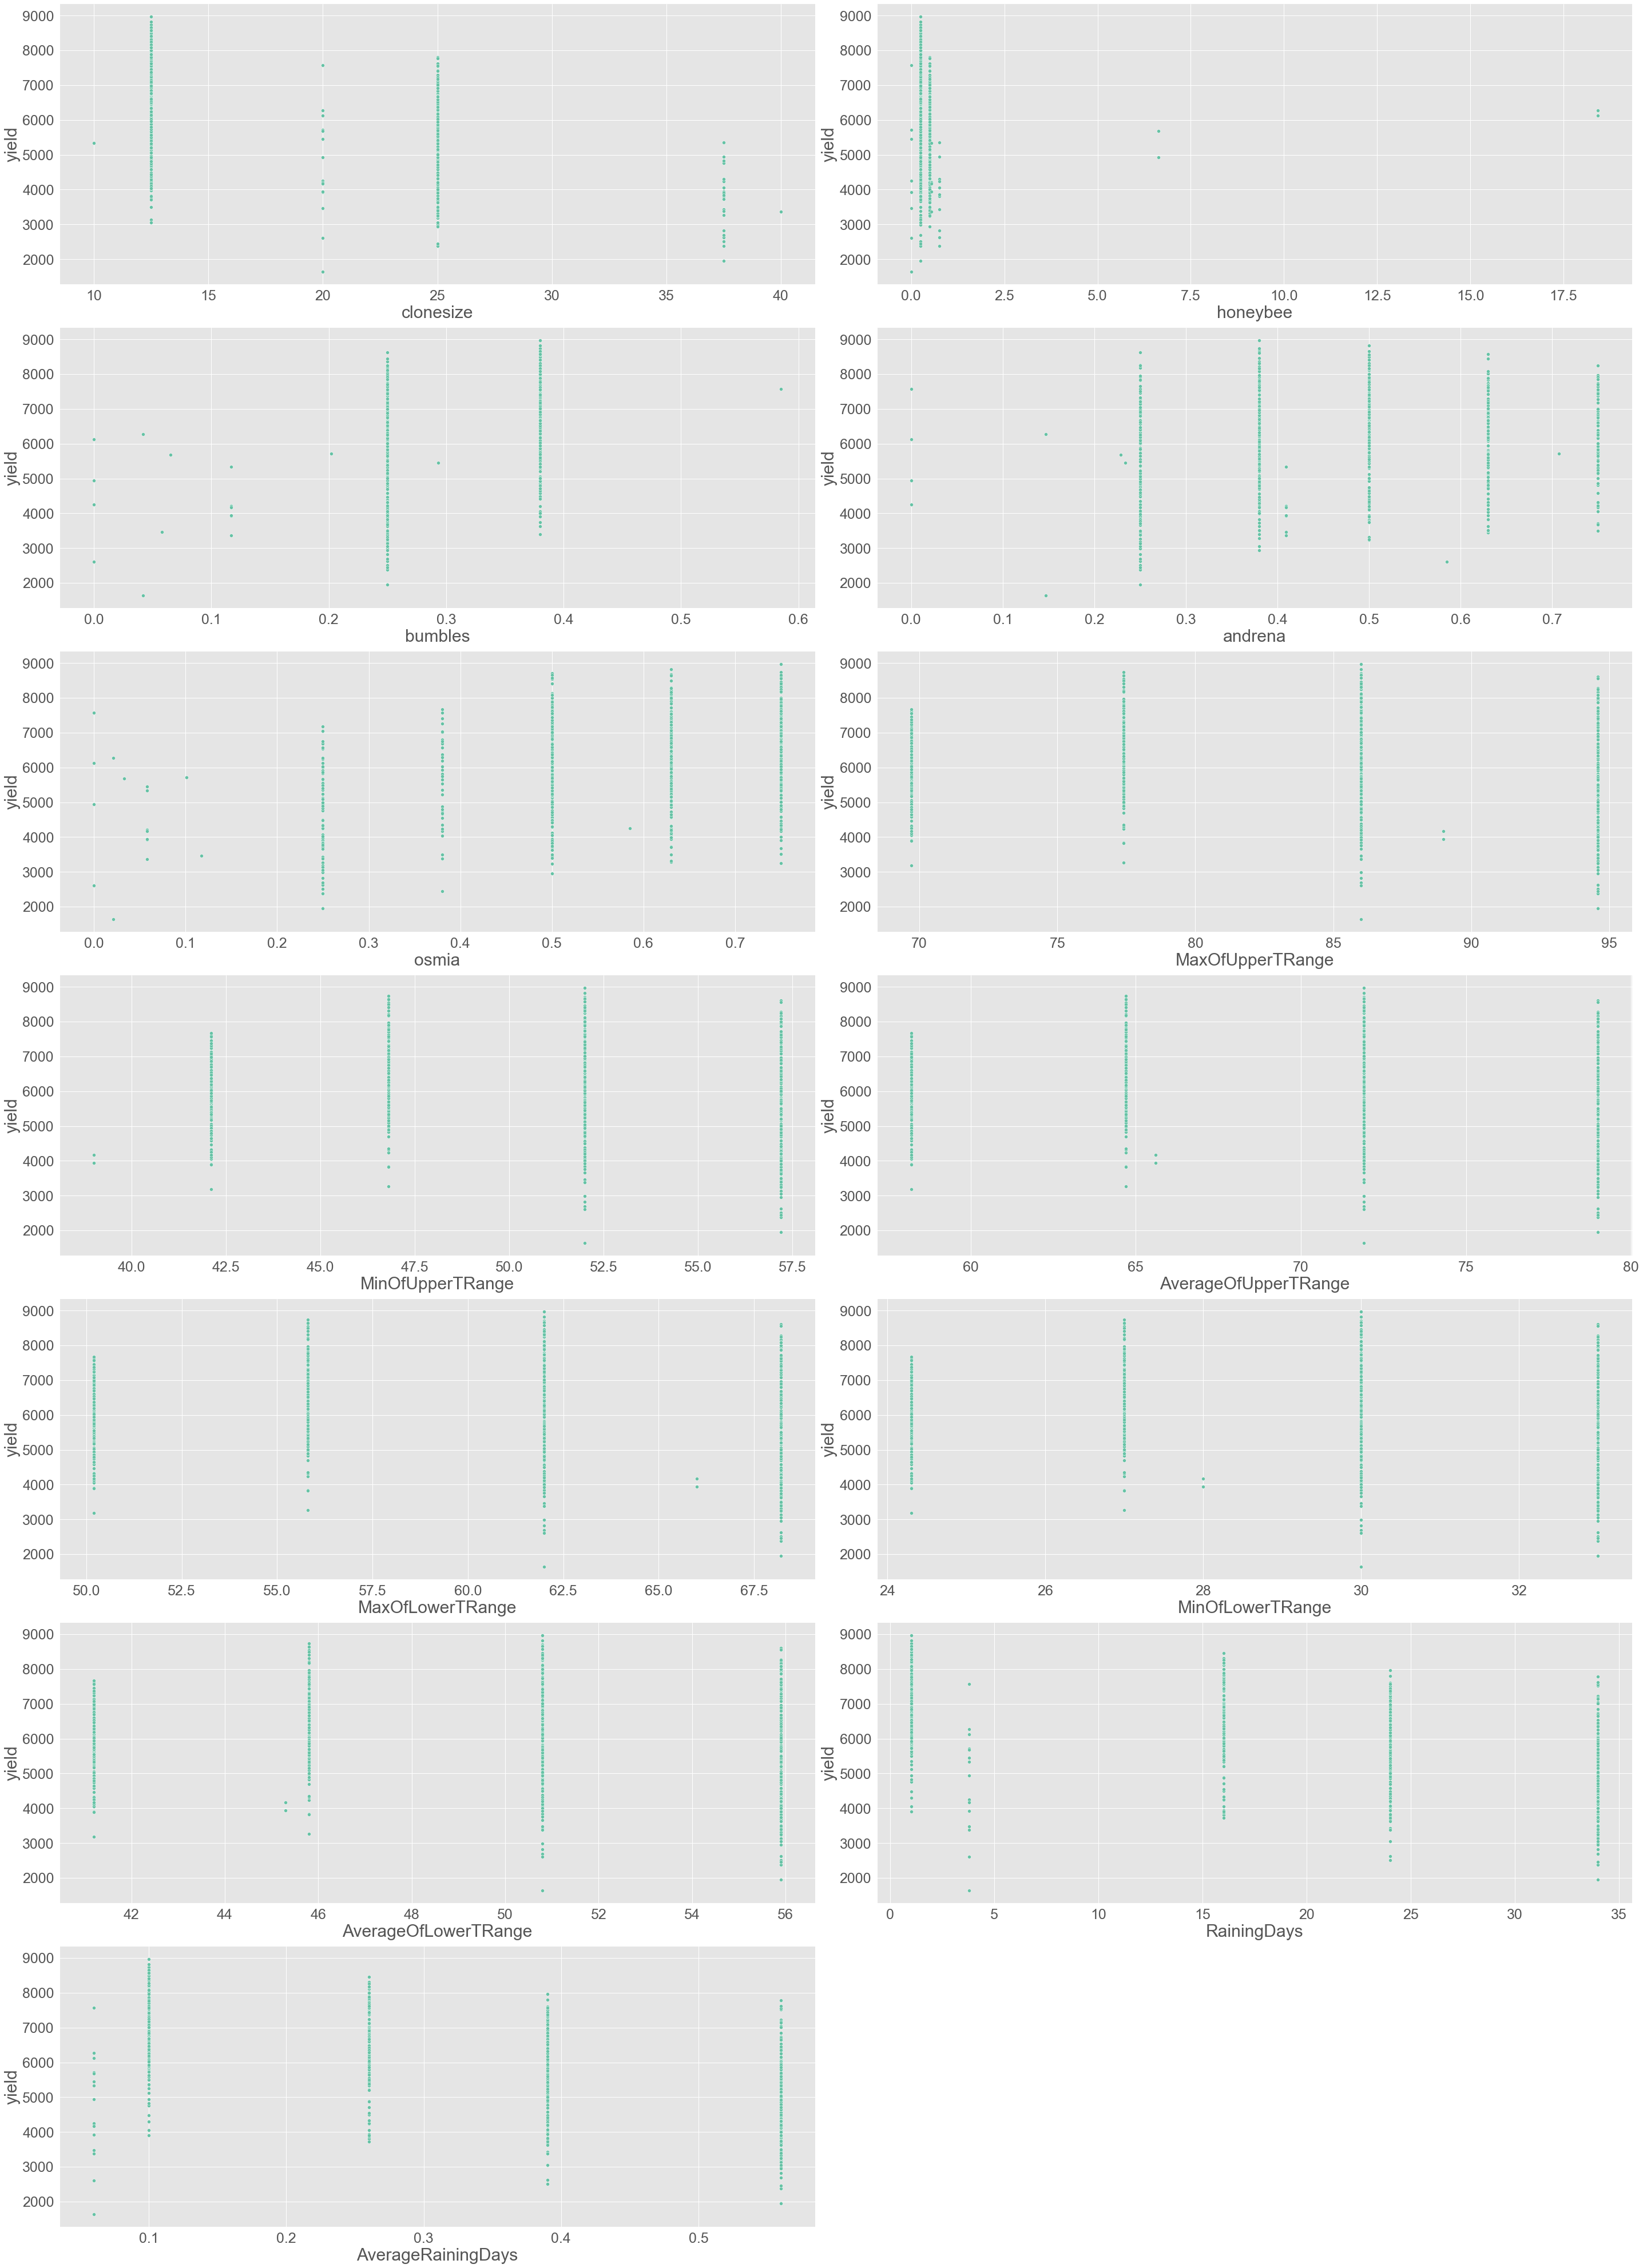

In [71]:
plt.figure(figsize=(40,70))

plt.subplots_adjust(top=0.94, bottom=0.05, hspace=0.3, wspace=0.2)

plot_data = df.drop(['Row#','fruitset','fruitmass','seeds','yield'], axis=1)

for i,col in enumerate(plot_data.columns):
        ax=plt.subplot(9,2,i+1)
        sns.scatterplot(df[col],df['yield'],ax=ax)
        ax.set_xlabel(f'{col}',fontsize=30)
        ax.set_ylabel('yield',fontsize=30)
        ax.tick_params(axis='both', which='major', labelsize=25)
        
plt.tight_layout()        

<AxesSubplot:>

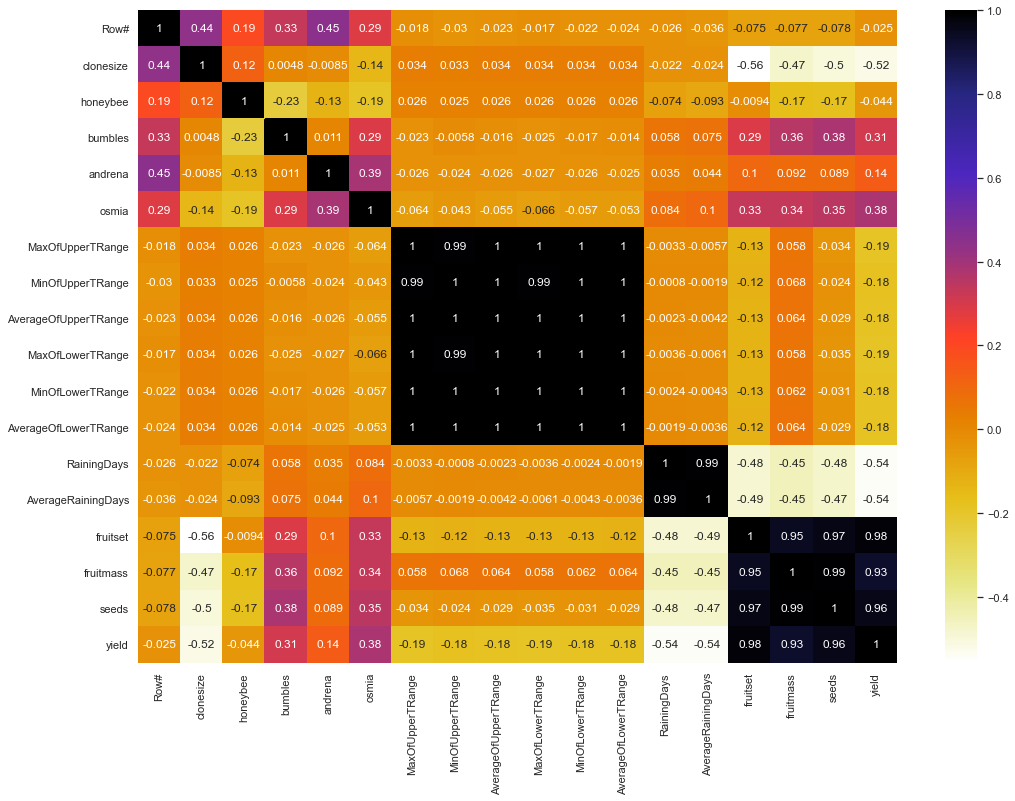

In [72]:
plt.figure(figsize=(17,12))
sns.set()
sns.heatmap(df.corr(), annot=True, cmap=plt.cm.CMRmap_r)

#### Observations

- Fruitmass,fruitset, seed seem to be highly correlated with each other and the target variable yield and can be removed
- All the temperature feature are highly correlated to each other. We can drop Max and Min for upper and lower T ranges
- Raining days and average raining days are highly correlated to each other
- Honeybee feature has out of bound outliers that can be removed or capped

## Pre-Processing

In [95]:
df.columns

Index(['Row#', 'clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia',
       'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange',
       'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange',
       'RainingDays', 'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds',
       'yield'],
      dtype='object')

In [96]:
processed_data = df.copy()

#### Dropping unnecessary columns and the columns that can cause multicollinearity

In [97]:
processed_data.drop(columns=['Row#','MaxOfUpperTRange', 'MinOfUpperTRange', 'MaxOfLowerTRange', 'MinOfLowerTRange','RainingDays','fruitset', 'fruitmass', 'seeds'],axis=1,inplace=True)

In [98]:
processed_data.shape

(777, 9)

In [99]:
Q1 = processed_data['honeybee'].quantile(0.25)
Q3 = processed_data['honeybee'].quantile(0.75)

IQR = Q3 - Q1

upper_limit = Q3 + 1.5 * IQR


In [100]:
upper_limit

0.875

In [101]:
processed_data['honeybee'] = np.where(processed_data['honeybee']>upper_limit,upper_limit,processed_data['honeybee'])

In [102]:
processed_data['honeybee'].value_counts()

0.250    446
0.500    302
0.750     11
0.000      8
0.537      6
0.875      4
Name: honeybee, dtype: int64

In [103]:
X = processed_data.drop(columns=['yield'])
y = processed_data['yield']

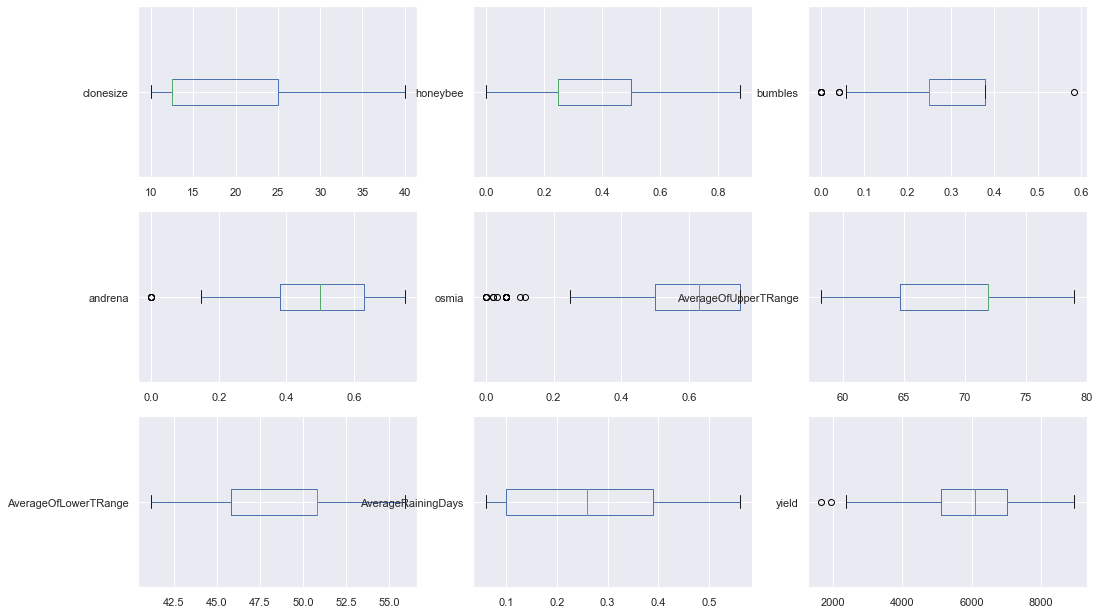

In [104]:
processed_data.plot(kind="box", 
                vert=False, # makes horizontal plots instead of vertical
                subplots=True, 
                layout = (6,3), 
                figsize=(17,22), 
                sharex=False, 
                sharey=False);

In [105]:
def remove_outliers(df):
    # Calculate first and third quartiles
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    
    # Calculate interquartile range
    IQR = Q3 - Q1
    
    # Remove outliers from all columns
    df_out = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
    
    return df_out

In [106]:
processed_data = remove_outliers(processed_data)

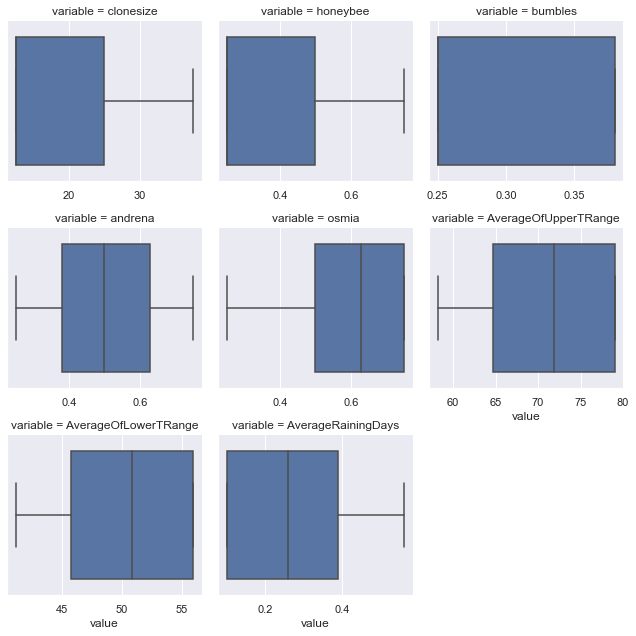

In [107]:
unpivot = pd.melt(processed_data,processed_data.describe().columns[-1],processed_data.describe().columns[:-1])

g = sns.FacetGrid(unpivot, col="variable", col_wrap=3, sharex=False, sharey=False)
g.map(sns.boxplot, "value")

plt.show()

In [108]:
processed_data.shape

(758, 9)

## Feature Selection

In [136]:
def select_features_corr_based(X_train, y_train, X_test, x="all"):
    if type(x) == str:
        fs_corr = SelectKBest(score_func=f_regression, k='all')
    else:
        fs_corr = SelectKBest(score_func=f_regression, k = x)
    fs_corr.fit(X_train, y_train)
    X_train_fs = fs_corr.transform(X_train)
    X_test_fs = fs_corr.transform(X_test)
    
    return X_train_fs, X_test_fs, fs_corr


In [137]:
def select_features_infogain_based(X_train, y_train, X_test, x="all"):
    if type(x) == str:
        fs_info = SelectKBest(score_func=mutual_info_regression, k='all')
    else:
        fs_info = SelectKBest(score_func=mutual_info_regression, k=x)
    fs_info.fit(X_train, y_train)
    X_train_fs = fs_info.transform(X_train)
    X_test_fs = fs_info.transform(X_test)
    
    return X_train_fs, X_test_fs, fs_info

In [138]:
X = processed_data.drop(columns=['yield'],axis=1)
y = processed_data['yield']

In [139]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.33)

In [140]:
X_train_fs_corr, X_test_fs_corr, fs_corr = select_features_corr_based(X_train, y_train, X_test)
X_train_fs_info, X_test_fs_info, fs_info = select_features_infogain_based(X_train, y_train, X_test)

In [141]:
def fs_score_plot(fs_func):
    
    for i in range(len(fs_func.get_feature_names_out())):
        print('Feature %s: %f' % (fs_func.get_feature_names_out()[i], fs_func.scores_[i]))
    # plot the scores
    plt.bar(fs_func.get_feature_names_out(), fs_func.scores_)
    plt.xticks(rotation=90)
    plt.show()

Feature clonesize: 190.602250
Feature honeybee: 71.368131
Feature bumbles: 28.289973
Feature andrena: 8.221807
Feature osmia: 62.454999
Feature AverageOfUpperTRange: 12.247350
Feature AverageOfLowerTRange: 12.332411
Feature AverageRainingDays: 271.442532


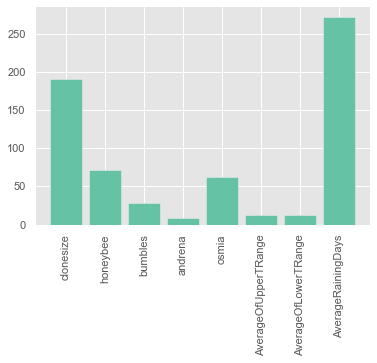

In [142]:
fs_score_plot(fs_corr)

Feature clonesize: 0.189462
Feature honeybee: 0.128426
Feature bumbles: 0.035377
Feature andrena: 0.037476
Feature osmia: 0.056575
Feature AverageOfUpperTRange: 0.103606
Feature AverageOfLowerTRange: 0.103606
Feature AverageRainingDays: 0.255653


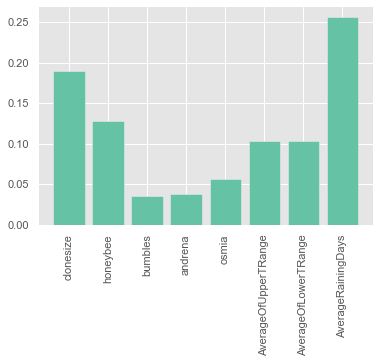

In [143]:
fs_score_plot(fs_info)

## Modelling

In [144]:
X = processed_data.drop(["yield"], axis=1)
y = processed_data['yield']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

X_train_fs, X_test_fs, fs_info = select_features_infogain_based(X_train, y_train, X_test, x=7)

In [147]:
X_train_fs.shape

(507, 7)

### Linear Regression

In [167]:
lr = LinearRegression()
lr.fit(X_train_fs,y_train)
y_pred = lr.predict(X_test_fs)

In [168]:
mae_linear = mean_absolute_error(y_test, y_pred)
mse_linear = mean_squared_error(y_test, y_pred)
rmse_linear = np.sqrt(mse_linear)
rsq_linear = r2_score(y_test, y_pred)

print('MAE: %.3f' % mae_linear)
print('MSE: %.3f' % mse_linear)
print('RMSE: %.3f' % rmse_linear)
print('R-Square: %.3f' % rsq_linear)

MAE: 493.667
MSE: 364173.431
RMSE: 603.468
R-Square: 0.803


### Random Forest Regressor

In [169]:
rf = RandomForestRegressor()

rf.fit(X_train_fs, y_train)
    
y_pred = rf.predict(X_test_fs)

In [170]:
mae_rf = mean_absolute_error(y_test, y_pred)
mse_rf = mean_squared_error(y_test, y_pred)
rmse_rf = np.sqrt(mse_rf)
rsq_rf = r2_score(y_test, y_pred)

print('MAE: %.3f' % mae_rf)
print('MSE: %.3f' % mse_rf)
print('RMSE: %.3f' % rmse_rf)
print('R-Square: %.3f' % rsq_rf)

MAE: 207.043
MSE: 65966.194
RMSE: 256.839
R-Square: 0.964


### Decision Tree Regressor

In [171]:
dtree = DecisionTreeRegressor()

dtree.fit(X_train_fs, y_train)

y_pred = dtree.predict(X_test_fs)

In [172]:
mae_dt = mean_absolute_error(y_test, y_pred)
mse_dt = mean_squared_error(y_test, y_pred)
rmse_dt = np.sqrt(mse_rf)
rsq_dt = r2_score(y_test, y_pred)

print('MAE: %.3f' % mae_dt)
print('MSE: %.3f' % mse_dt)
print('RMSE: %.3f' % rmse_dt)
print('R-Square: %.3f' % rsq_dt)

MAE: 237.028
MSE: 90314.317
RMSE: 256.839
R-Square: 0.951


### XG Boost Regressor

In [173]:
xgb = XGBRegressor()

xgb.fit(X_train_fs, y_train)

y_pred = xgb.predict(X_test_fs)

In [174]:
mae_xg = mean_absolute_error(y_test, y_pred)
mse_xg = mean_squared_error(y_test, y_pred)
rmse_xg = np.sqrt(mse_rf)
rsq_xg = r2_score(y_test, y_pred)

print('MAE: %.3f' % mae_xg)
print('MSE: %.3f' % mse_xg)
print('RMSE: %.3f' % rmse_xg)
print('R-Square: %.3f' % rsq_xg)

MAE: 216.519
MSE: 70371.824
RMSE: 256.839
R-Square: 0.962


## Model Evaluation

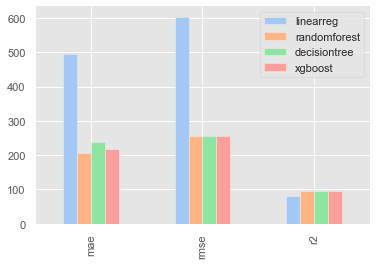

In [176]:
error_rec = {
    "linearreg": {
        "mae": mae_linear,
        "rmse": rmse_linear,
        'r2': rsq_linear*100
    },
    "randomforest": {
        "mae": mae_rf,
        "rmse": rmse_rf,
        'r2': rsq_rf*100
    },
    "decisiontree": {
        "mae": mae_dt,
        "rmse": rmse_dt,
        'r2': rsq_dt*100
    },
    "xgboost": {
        "mae": mae_xg,
        "rmse": rmse_xg,
        'r2': rsq_xg*100
    },
}
pd.DataFrame(error_rec).plot(kind="bar", 
             color=[
                 sns.color_palette("pastel")[0], 
                 sns.color_palette("pastel")[1], 
                 sns.color_palette("pastel")[2], 
                 sns.color_palette("pastel")[3]]);

## Hyperparameter Tuning

In [181]:
kf = KFold(n_splits = 5, shuffle=True, random_state=0)
fs_info_v0 = SelectKBest(score_func = mutual_info_regression)


# define pipeline for each algorithm
# define GSCV for each
# loop through it

# pipe = Pipeline ([(preprocessing: scaling), (FS: selectKBEST), (modelling: model)])


pipe_lr = Pipeline([
    ('sel', fs_info_v0), 
    ('model', LinearRegression())
])

pipe_rf = Pipeline([
    ('sel', fs_info_v0), 
    ('model', RandomForestRegressor(random_state=1))
])

pipe_dtree = Pipeline([
    ('sel', fs_info_v0), 
    ('model', DecisionTreeRegressor(random_state=1))
])

pipe_xgb = Pipeline([
    ('sel', fs_info_v0), 
    ('model', XGBRegressor(random_state=1))
])

In [195]:

# Define hyperparameter grids for each pipeline
grid_params_lr = [{'sel__k': [1,2,3,4,5,6,7]}] 

grid_params_rf = [{'sel__k': [1,2,3,4,5,6,7],
        'model__max_depth': [15, 18, 10],
        'model__min_samples_split': [15, 18, 10]
                  }]

grid_params_dtree = [{'sel__k': [1,2,3,4,5,6,7],
                     'model__max_depth': [15, 18, 10],
                     'model__max_features': ['auto', 'sqrt']
                     }]

grid_params_xgb = [{'sel__k': [1,2,3,4,5,6,7],
                    'model__max_depth': [9,12],
                   'model__min_child_weight': [7,8],
                   'model__subsample': [i/10. for i in range(9,11)]
                   }]

scoring = {
    'r2_score': make_scorer(r2_score),
    'mse': make_scorer(mean_squared_error),
    'mae':make_scorer(mean_absolute_error,greater_is_better=False),
    'rmse':make_scorer(lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)), greater_is_better=False)
}

# Define GridSearchCV for each pipeline
gs_lr = GridSearchCV(pipe_lr, grid_params_lr, cv=kf, scoring=scoring,refit='r2_score')
gs_rf = GridSearchCV(pipe_rf, grid_params_rf, cv=kf, scoring=scoring,refit='r2_score')
gs_dtree = GridSearchCV(pipe_dtree, grid_params_dtree, cv=kf, scoring=scoring,refit='r2_score')
gs_xgb = GridSearchCV(pipe_xgb, grid_params_xgb, cv=kf, scoring=scoring,refit='r2_score')

# Fit GridSearchCV for each pipeline
gs_lr.fit(X_train_fs, y_train)
gs_rf.fit(X_train_fs, y_train)
gs_dtree.fit(X_train_fs, y_train)
gs_xgb.fit(X_train_fs, y_train)

# Print best hyperparameters and MSE scores for each pipeline
print("Linear Regression best parameters:", gs_lr.best_params_)
print("Linear Regression best score:", gs_lr.best_score_)
print("Random Forest best parameters:", gs_rf.best_params_)
print("Random Forest best score:", gs_rf.best_score_)
print("Decision Tree best parameters:", gs_dtree.best_params_)
print("Decision Tree best score:", gs_dtree.best_score_)
print("XGBoost best parameters:", gs_xgb.best_params_)
print("XGBoost best score:", gs_xgb.best_score_)


Linear Regression best parameters: {'sel__k': 7}
Linear Regression best score: 0.8118445097942345
Random Forest best parameters: {'model__max_depth': 15, 'model__min_samples_split': 10, 'sel__k': 7}
Random Forest best score: 0.9171433168888411
Decision Tree best parameters: {'model__max_depth': 15, 'model__max_features': 'auto', 'sel__k': 7}
Decision Tree best score: 0.9379102929644993
XGBoost best parameters: {'model__max_depth': 12, 'model__min_child_weight': 8, 'model__subsample': 0.9, 'sel__k': 7}
XGBoost best score: 0.966887756672077


In [196]:
gs_lr = GridSearchCV(pipe_lr, grid_params_lr, cv=kf, scoring=scoring,refit='mae')
gs_rf = GridSearchCV(pipe_rf, grid_params_rf, cv=kf, scoring=scoring,refit='mae')
gs_dtree = GridSearchCV(pipe_dtree, grid_params_dtree, cv=kf, scoring=scoring,refit='mae')
gs_xgb = GridSearchCV(pipe_xgb, grid_params_xgb, cv=kf, scoring=scoring,refit='mae')

# Fit GridSearchCV for each pipeline
gs_lr.fit(X_train_fs, y_train)
gs_rf.fit(X_train_fs, y_train)
gs_dtree.fit(X_train_fs, y_train)
gs_xgb.fit(X_train_fs, y_train)

# Print best hyperparameters and MSE scores for each pipeline
print("Linear Regression best parameters:", gs_lr.best_params_)
print("Linear Regression best score:", gs_lr.best_score_)
print("Random Forest best parameters:", gs_rf.best_params_)
print("Random Forest best score:", gs_rf.best_score_)
print("Decision Tree best parameters:", gs_dtree.best_params_)
print("Decision Tree best score:", gs_dtree.best_score_)
print("XGBoost best parameters:", gs_xgb.best_params_)
print("XGBoost best score:", gs_xgb.best_score_)

Linear Regression best parameters: {'sel__k': 7}
Linear Regression best score: -462.4044623892053
Random Forest best parameters: {'model__max_depth': 15, 'model__min_samples_split': 10, 'sel__k': 7}
Random Forest best score: -288.4486503564598
Decision Tree best parameters: {'model__max_depth': 15, 'model__max_features': 'auto', 'sel__k': 7}
Decision Tree best score: -245.01785538011063
XGBoost best parameters: {'model__max_depth': 12, 'model__min_child_weight': 7, 'model__subsample': 0.9, 'sel__k': 7}
XGBoost best score: -185.43621657420073


### Retune the Random forest and xgb model

In [203]:
grid_params_rf1 = [{
        'model__max_depth': [15, 18, 10],
        'model__min_samples_split': [2,5]
                  }]

RF1 = GridSearchCV(
    estimator = Pipeline([
                    ('sel', SelectKBest(score_func=mutual_info_regression, k=7)), 
                    ('model', RandomForestRegressor(random_state=1, criterion='squared_error'))
                ]),
            param_grid=grid_params_rf1,
            scoring='neg_mean_absolute_error',
            cv=kf, 
            n_jobs= -1)


print("Random Forest V-1 optimising...")

RF1.fit(X_train_fs, y_train)
print('Best Config: %s' % RF1.best_params_)
print('Best MAE: %.3f' % RF1.best_score_)
y_pred_v1_rf1 = RF1.predict(X_test_fs)
print('Test set mean absolute error for best params: %.3f ' % mean_absolute_error(y_test, y_pred_v1_rf1))
print('Test set root mean squared error for best params: %.3f ' % np.sqrt(mean_absolute_error(y_test, y_pred_v1_rf1)))


Random Forest V-1 optimising...
Best Config: {'model__max_depth': 10, 'model__min_samples_split': 2}
Best MAE: -215.738
Test set mean absolute error for best params: 212.976 
Test set root mean squared error for best params: 14.594 


In [206]:
from yellowbrick.regressor import PredictionError,ResidualsPlot
best_param_model = RF1.best_estimator_

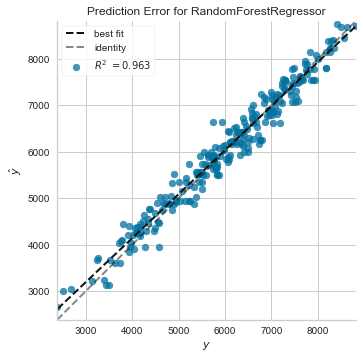

In [207]:
visualizer = PredictionError(best_param_model)
visualizer.fit(X_train_fs, y_train)
visualizer.score(X_test_fs, y_test)
visualizer.show()
plt.show()

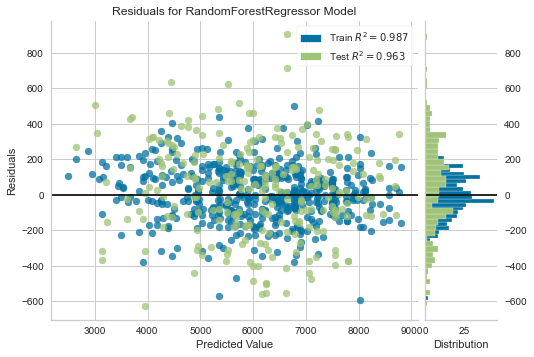

In [208]:
visualizer = ResidualsPlot(best_param_model)
visualizer.fit(X_train_fs, y_train)
visualizer.score(X_test_fs, y_test)
visualizer.show()  
plt.show()

#### Finalizing the model

In [210]:
fs_rf = SelectKBest(score_func=mutual_info_regression, k=7)
fs_rf.fit(X_train,y_train)
X_train_rf = fs_rf.transform(X_train)
X_test_rf = fs_rf.transform(X_test)
rf_final = RandomForestRegressor(max_depth = 10, min_samples_split = 2, criterion = 'squared_error')

rf_final.fit(X_train_rf, y_train)
rf_pred = rf_final.predict(X_test_rf)

In [211]:
print(mean_absolute_error(y_test,rf_pred))
print(np.sqrt(mean_squared_error(y_test, rf_pred)))

210.33732527763613
259.3790193517077


In [212]:
with open('rf_tuned_final.joblib', 'wb') as f:
    joblib.dump(rf_final, f, compress=1)

## Model Explainability

In [214]:
feature_columns = [X.columns[i] for i in range(len(fs_rf.get_support())) if fs_rf.get_support()[i]]
feature_columns

['clonesize',
 'honeybee',
 'bumbles',
 'osmia',
 'AverageOfUpperTRange',
 'AverageOfLowerTRange',
 'AverageRainingDays']

In [215]:
pd.DataFrame(X_test_rf, columns=[X.columns[i] for i in range(len(fs_rf.get_support())) if fs_rf.get_support()[i]])

,clonesize,honeybee,bumbles,osmia,AverageOfUpperTRange,AverageOfLowerTRange,AverageRainingDays
0,25.0,0.50,0.38,0.63,58.2,41.2,0.39
1,25.0,0.50,0.25,0.63,64.7,45.8,0.56
2,25.0,0.50,0.25,0.75,71.9,50.8,0.56
3,25.0,0.50,0.38,0.63,71.9,50.8,0.10
4,25.0,0.50,0.25,0.75,58.2,41.2,0.39
...,...,...,...,...,...,...,...
246,12.5,0.25,0.25,0.75,79.0,55.9,0.26
247,25.0,0.50,0.38,0.50,79.0,55.9,0.56
248,25.0,0.50,0.25,0.63,71.9,50.8,0.10
249,25.0,0.50,0.25,0.50,71.9,50.8,0.26


In [216]:
X_test_rf_df = pd.DataFrame(X_test_rf, columns=[X.columns[i] for i in range(len(fs_rf.get_support())) if fs_rf.get_support()[i]])

In [217]:
shap_values = shap.TreeExplainer(rf_final).shap_values(X_test_rf_df)

In [224]:
shap_values.shape

(251, 7)

In [219]:
shap_interaction_values = shap.TreeExplainer(rf_final).shap_interaction_values(X_test_rf_df)

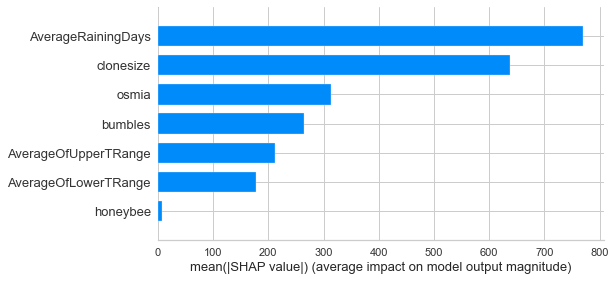

In [220]:
shap.summary_plot(shap_values, X_test_rf_df, plot_type="bar")

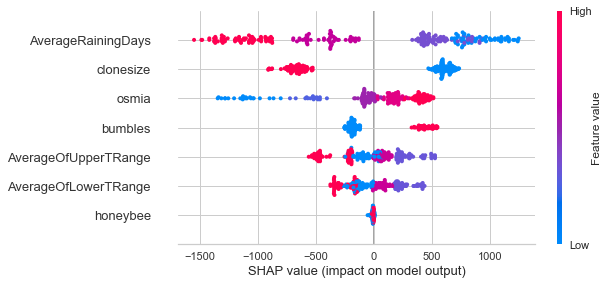

In [221]:
shap.summary_plot(shap_values, X_test_rf_df)

In [222]:
shap.initjs()

shap.force_plot(shap.TreeExplainer(rf_final).expected_value, shap_values[50,0:-3], X_test_rf_df.iloc[50,0:-3])

In [223]:
shap.force_plot(shap.TreeExplainer(rf_final).expected_value, shap_values[0:257,:], X_test_rf_df.iloc[0:257,:])

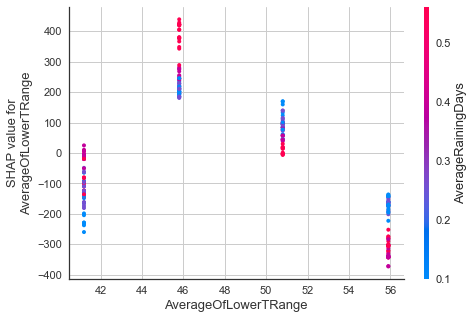

In [225]:
shap.dependence_plot(5, shap_values, X_test_rf_df)

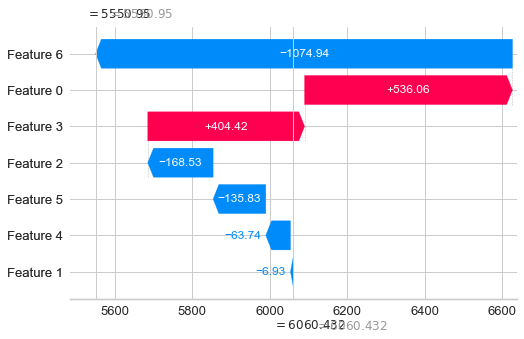

In [226]:
row = 124
shap.plots._waterfall.waterfall_legacy(shap.TreeExplainer(rf_final).expected_value[0], shap_values[row])

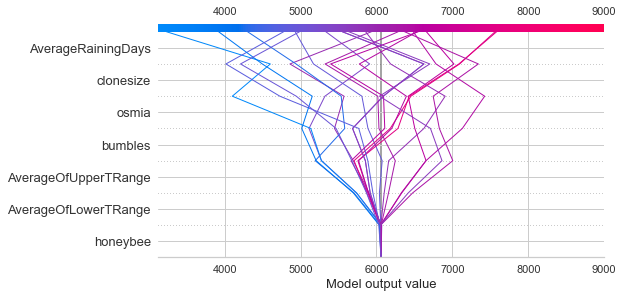

In [227]:
shap.decision_plot(shap.TreeExplainer(rf_final).expected_value[0], shap_values[110:130], feature_columns)